# Assignment 1 - Heart Disease Prediction 

## 1) Exploratory Data Analysis

### Part (a) - General Description and Information

The below code segment is the necessary importation of libraries to carry out the entire project.

In [1]:
#libraries for visualization
import numpy as np 
import pandas as pd 
pd.set_option("display.max_rows",None) 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#library for standardization, test train splitting and GridSearch 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 

#library for ML algorithms and its accuracy score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the heart.csv file and storing it as a dataframe.
df = pd.read_csv('heart.csv')

In [3]:
# viewing the first 10 records of the dataframe.
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
# this gives the analytical summary of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# stats for categorical data
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### <font color='blue'>Observations:</font>

* Average age of the recorded patients is 54 years, and the range lies from 28 to 77.
* It is observed that the highest record for RestingECG turned out to be normal (552 out of 918 records).
* The most observed Chest Pain Type is Asymptomatic with having records of 496/918.

In [6]:
# general information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### <font color='blue'>Observations:</font>
* It could be observed that there are no null data in this dataset.

In [7]:
# data types for all the columns in the dataset
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# shape of the data set.
df.shape

(918, 12)

In [9]:
# a brief description to the number of columns in the data frame to determine , what columns belongs to categorical data type and numerical data type
def data_description(df):
    columns=df.columns.to_list()
    print('Number of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    numeric_col=df.describe().columns.to_list()
    category_col=[]
    for i in columns:
        if(numeric_col.count(i)==0):
            category_col.append(i)
        else:
            continue
    print('\nNumber of Numerical Columns: ',len(numeric_col))
    print('\nNumerical Column Names: ',numeric_col)
    print('\nNumber of Categorical Columns: ',len(category_col))
    print('\nCategorical Column Names: ',category_col)
    
data_description(df)

Number of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Number of Numerical Columns:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

Number of Categorical Columns:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### <font color='blue'>Observations:</font>
* The dataset consists of 918 rows and 12 columns.
* There are 7 numeric columns and 5 categorical columns.

### Part (b) - Determining the frequency

In [10]:
# to determine the frequency for each feature in the dataset. 
numeric_col=df.describe().columns.to_list()
category_col=[]
columns=df.columns.to_list()
for i in columns:
    print(str(i) + ' Frequency' )
    print(df[i].value_counts())
    print('_'*20)

Age Frequency
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
____________________
Sex Frequency
M    725
F    193
Name: Sex, dtype: int64
____________________
ChestPainType Frequency
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
____________________
RestingBP Frequency
120    132
130    118
140    107
110     58
150     55
160     50
125     29
135     20
115     19
128     18
145     18
138     17
132     17
100     15
170     14
112     14
136     13
122     12
180     12
124     12
142     11
134     11
118     10
105      9
144    

In [11]:
# to figure out the number of unique values in each columns 
df.nunique() 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### <font color='blue'>Observations:</font>
* Age: Has 50 unique values with highest number of frequency belonging to age category of 54 (frequency 51).
* Sex: There are 725 records which consists of Males.
* ChestPainType: 4 possible records of chest paint types recorded with highest value belonging to ASY class.
* RestingBP: Consists of 67 unique values, highest number belonging to 120.
* Cholesterol: Consists of 222 unique values, 0 having highest values(which in terms of medical not ideal and this would be handled later.
* FastingBS: Is basically classification of > 120 belongs to 1 and 0 so in that manner, higher frequency belongs to 1 (704)
* RestingECG: As an overall its Normal, as the highest frequency (552) belongs to Normal class.
* MaxHR: Highest frequency belongs to 150.
* ExerciseAngina: overall Exercise-induced angina is no (547).
* Oldpeak Frequency: overall with a highest frequency of 368 belongs to 0.
* ST_Slope: Is generally flat for most of the recorded data (460).
* HeartDisease: Out of 918 records 508 of them have heart disease. 

### Part (c) - Plotting of histogram and count plots to check distribution of features

In [12]:
# this function generates histogram for all the numerical features in the dataset except the target variable HeartDisease
def histogram_for_numerical_features(df_column):
    plt.figure(figsize=(8,5))
    sns.set(font_scale=1)
    sns.histplot(data=df, x=df_column, hue="HeartDisease", multiple="stack", palette='magma')
    plt.title(str(df_column)+ ' vs HeartDisease', fontdict={'fontsize': 13})
    plt.show()

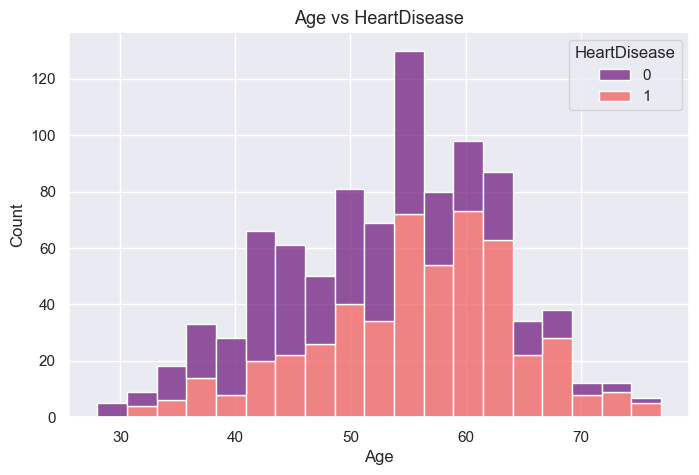

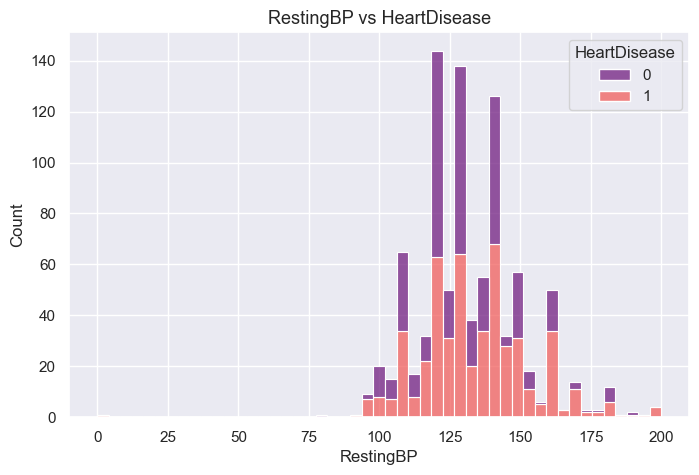

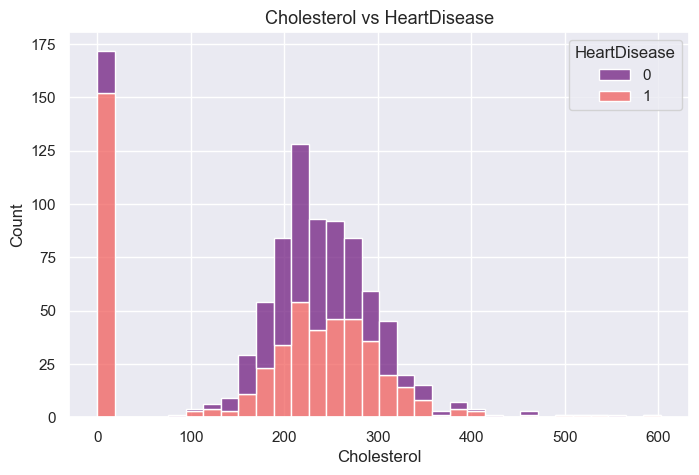

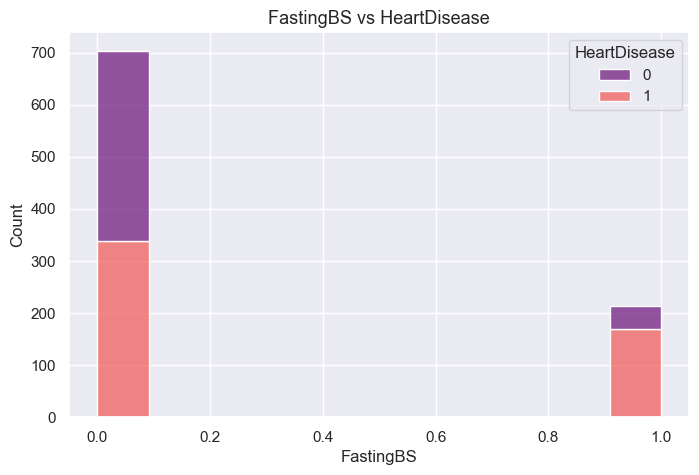

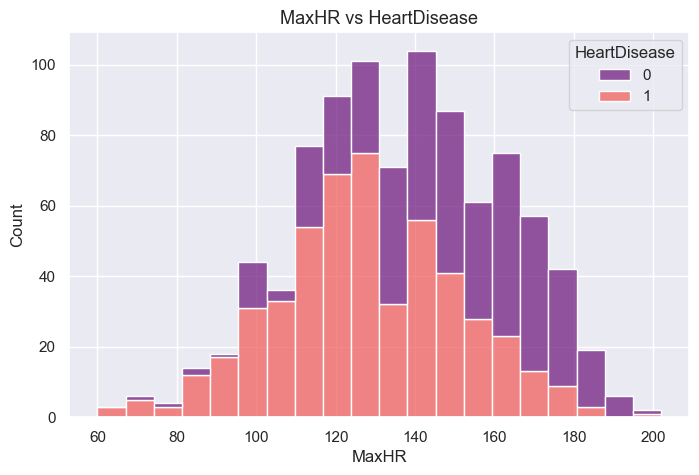

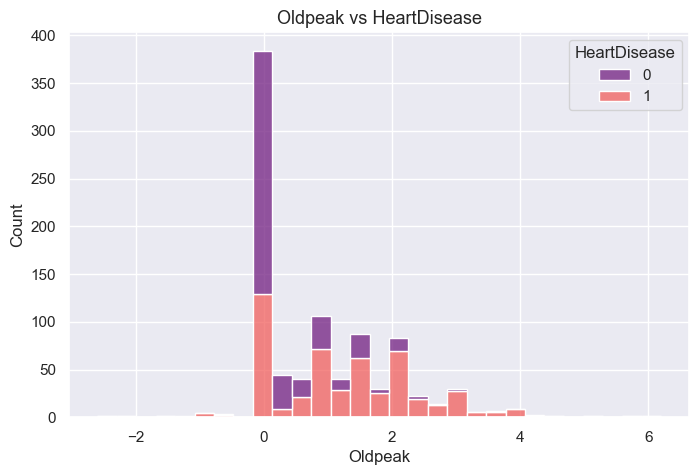

In [13]:
# condition to ensure all numeric features except target variable being plotted
numeric_col=df.describe().columns.to_list()
for column in numeric_col:
    if (column == 'HeartDisease'):
        break
    else:
        histogram_for_numerical_features(column)

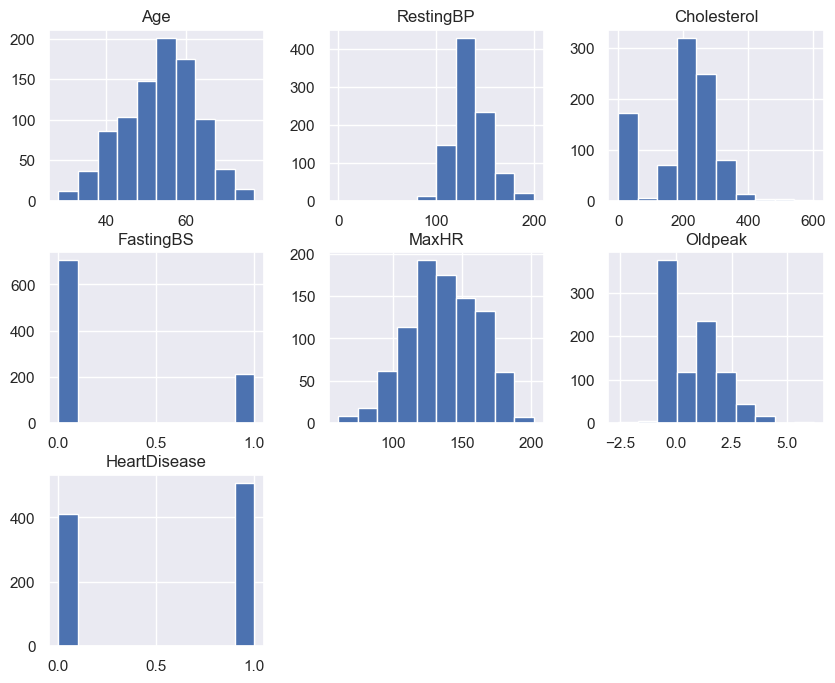

In [14]:
# standard histogram without conditional of excempting target variable.
sns.set()
df.hist(figsize=(10,8))
plt.show()

### <font color='blue'>Observations:</font>
* Age: is very close to a normal distribution, with a smll negative skewness (left skewed).
* RestingBP: distribution is moderately skewd to the right.
* Cholesterol: there are many patients who are not supposed to have Choresterol = 0, which is impossible and this will be handled later.
* FastingBS: a binary variable, hence bit difficult to check the skewness.
* MaxHR:  looks like a normal distribution, with a small negative skewness.
* Oldpeak Frequency: distribution seems to look like it is skewd to the left.

In [15]:
# this function generates countplot for all the categorical features in the dataset
def countplot_for_other_features(df_column):
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1)
    sns.countplot(x = df_column, hue= 'HeartDisease', data =df)
    plt.title(str(df_column)+' vs HeartDisease', fontdict={'fontsize': 12})
    plt.show()

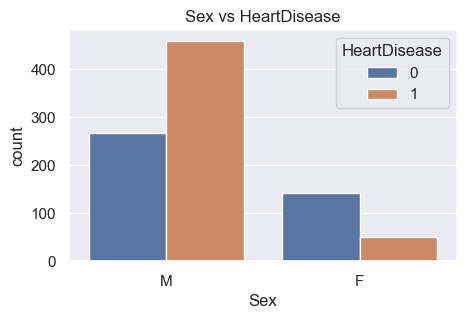

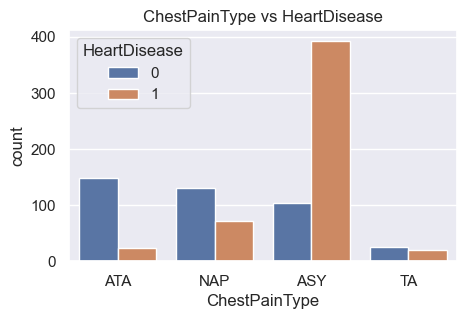

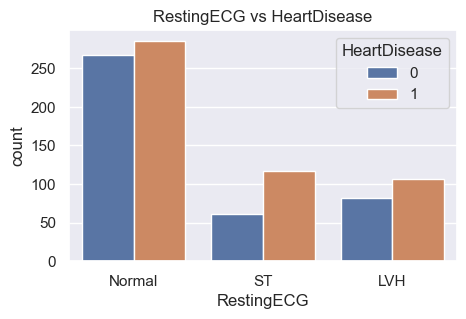

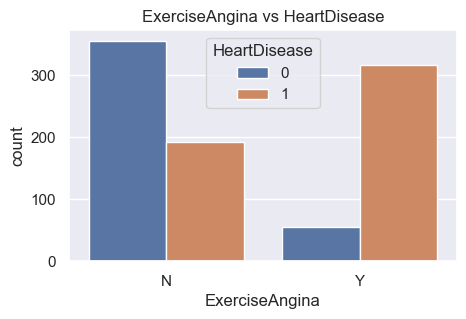

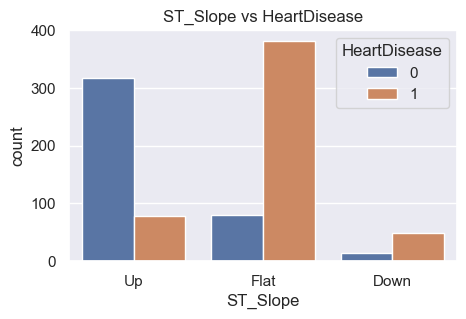

In [16]:
numeric_col=df.describe().columns.to_list()
category_col=[]
columns=df.columns.to_list()
for i in columns:
    if(numeric_col.count(i)==0):
        category_col.append(i)
    else:
        continue
for column in category_col:
    countplot_for_other_features(column)

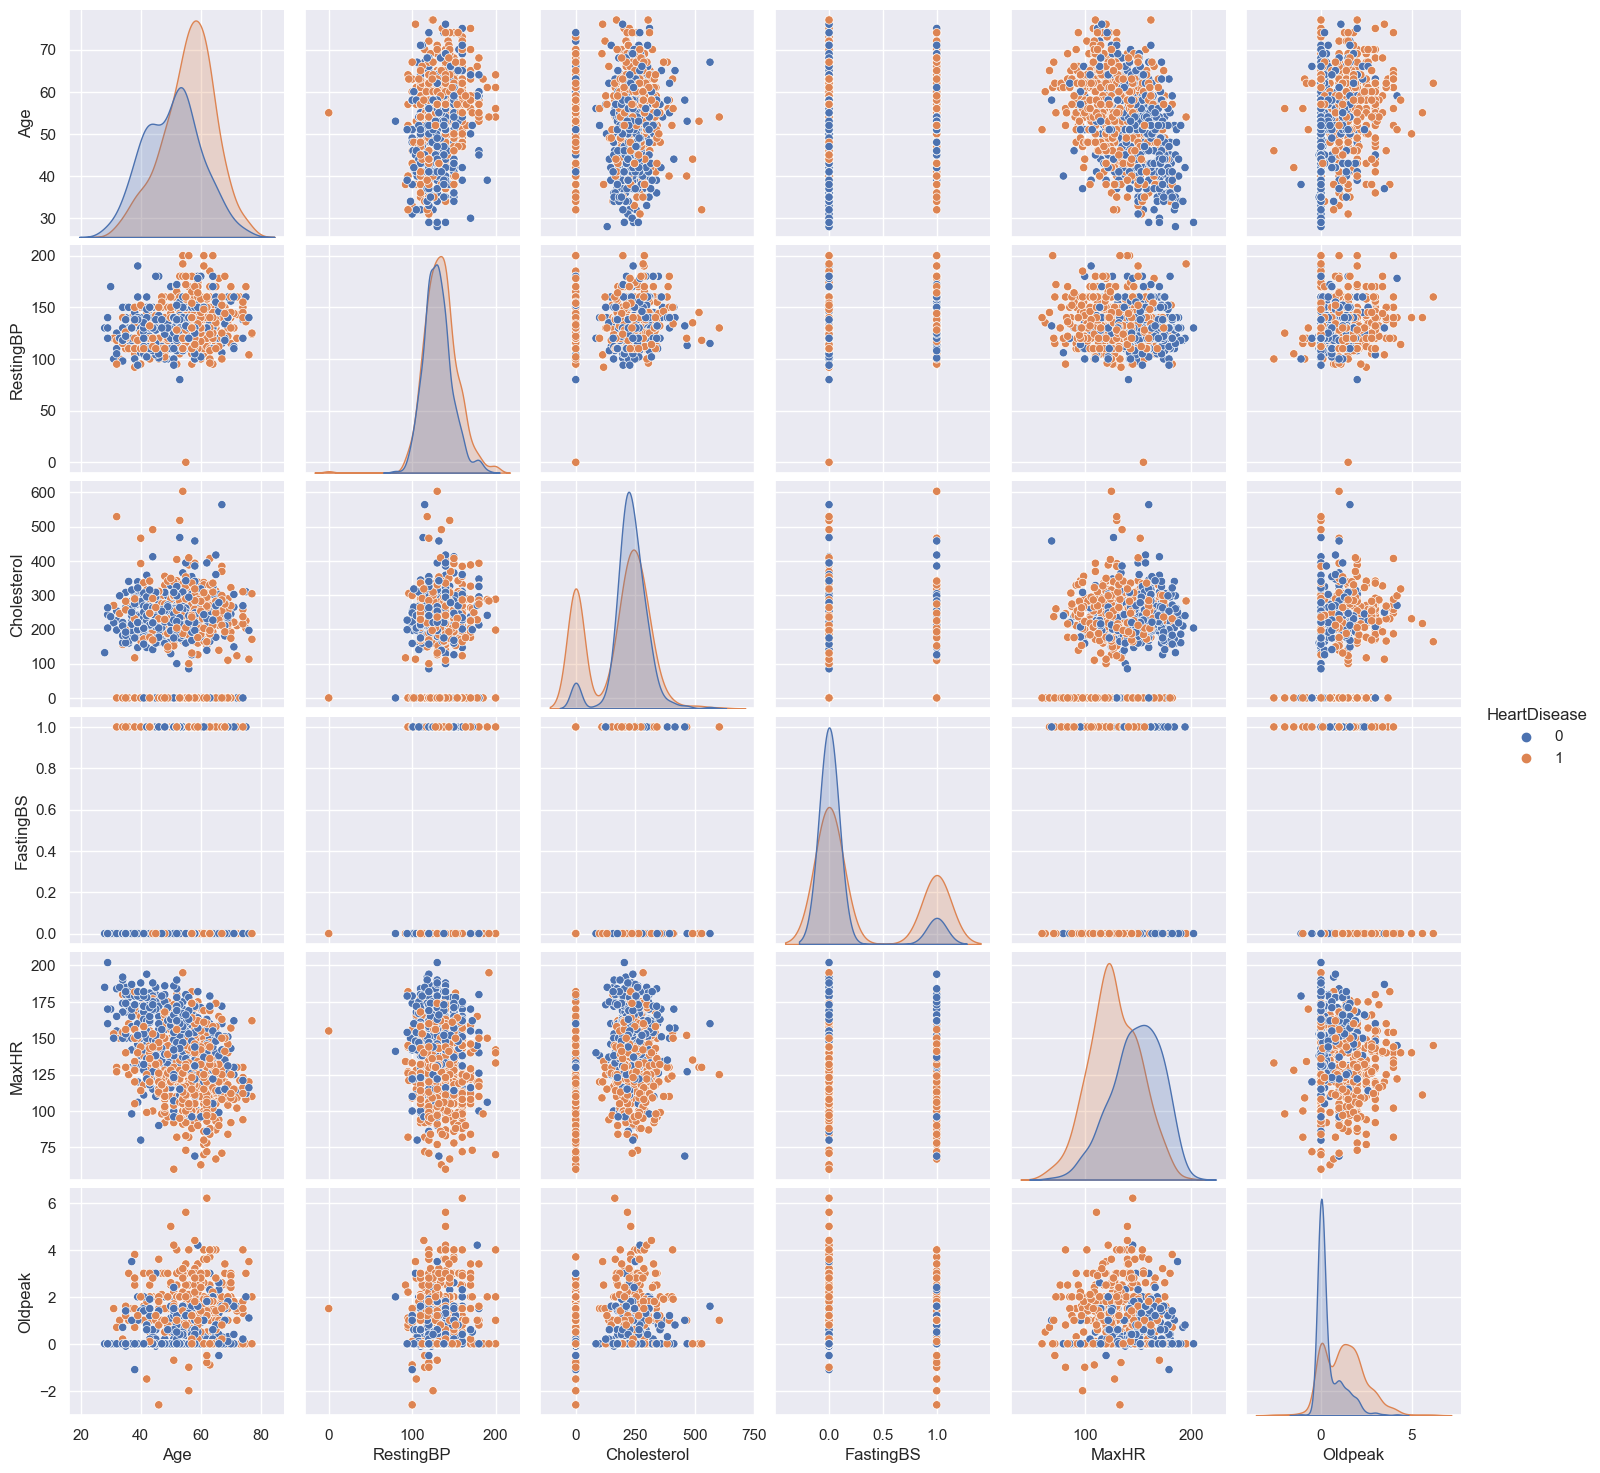

In [17]:
# further analysis with pairplot to show the distrubition of each numerical features against the target variable
sns.pairplot(df,hue='HeartDisease')
plt.show()

### Part (d) - Correlation Matrix with heatmap 

In [18]:
# to determine the correlation matrix
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


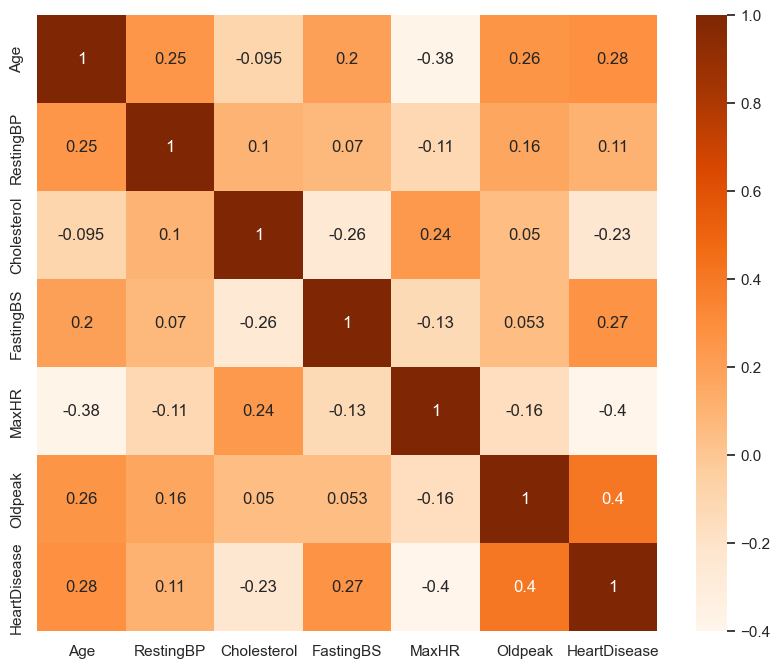

In [19]:
# heatmap to visually show the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'Oranges')
plt.show()

### <font color='blue'>Observations:</font>
* There is no feature present with correlation greater than 0.5. Therefore, there is no need to drop any feature column.

## 2) Feature Engineering

### Part (a) - Checking for Duplication and Null values.

In [20]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
df.duplicated().sum()

0

### <font color='blue'> Observations: </font>
As there aren't any duplicate values nor missing values; dropping of record is not needed.

### Part (b) - Checking for Imbalance class

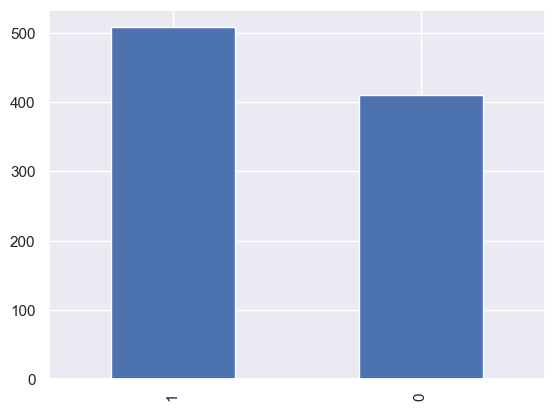

In [22]:
df.HeartDisease.value_counts().plot(kind = 'bar')
plt.show()

### <font color='blue'>Observations: </font>
From Question 1, Part (b) we got the frequency of Heart Disease as 508 for '1' and 410 for '0' respectively. In addition to that, the above bar plot also visually proves that there isn't a huge difference between the two classes. To be more statistical, it is 55% (1) - majority class and 45% (0) - minority class respectively. Which doesn't require the need of any downsamlpling nor upweighting to be done.

### Part (c) Outlier Handling

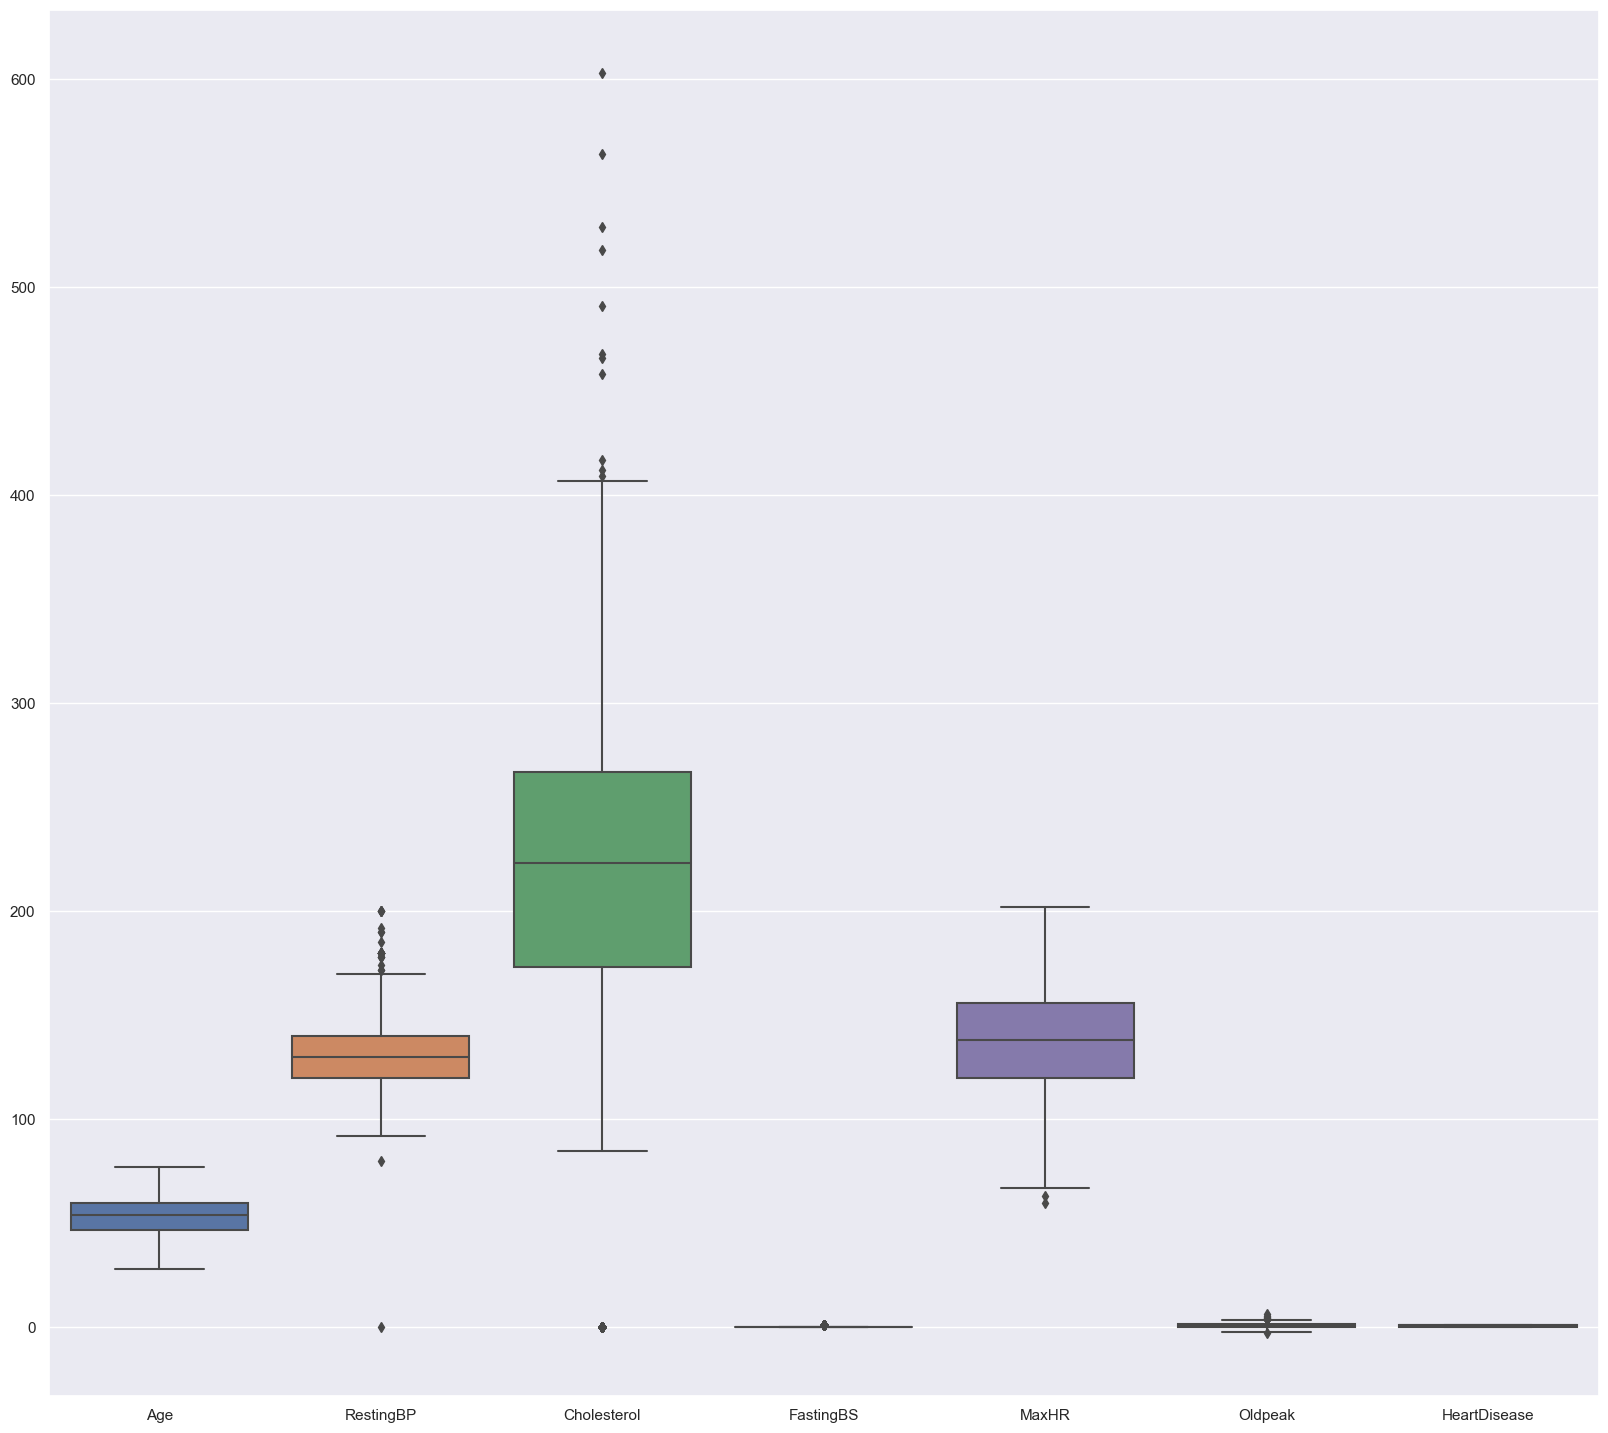

In [23]:
# overview boxplot for all features
plt.figure(figsize=(20,18))
sns.boxplot(data = df)
plt.show()

#### Method 1 - Detection of outliers using boxplot and IQR calculation.


In [24]:
def outliers_details_boxplot_graph(df_column):
    plt.figure(figsize=(5,3))
    sns.boxplot(x = df_column, data = df)
    plt.show()
    Q3, Q1 = np.percentile(df_column, [75 ,25]) 
    IQR = Q3 - Q1
    print('Q1: ',Q1)
    print('Q3: ',Q3)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q1-1.5*IQR, 'and beyond', Q3+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q1-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q3+1.5*IQR]))
    print('_' *50)

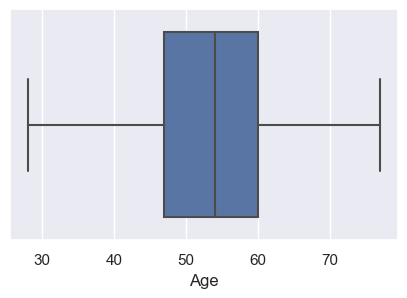

Q1:  47.0
Q3:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0
__________________________________________________


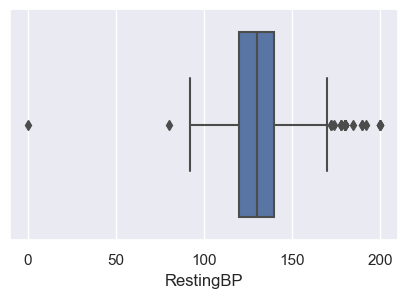

Q1:  120.0
Q3:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26
__________________________________________________


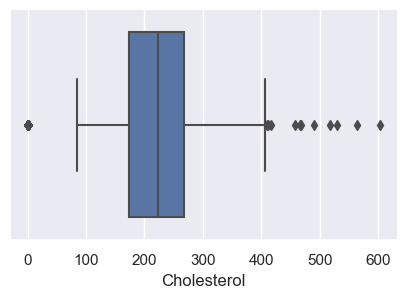

Q1:  173.25
Q3:  267.0
Inter Quartile Range:  93.75
Outliers lie before 32.625 and beyond 407.625
Number of Rows with Left Extreme Outliers: 172
Number of Rows with Right Extreme Outliers: 11
__________________________________________________


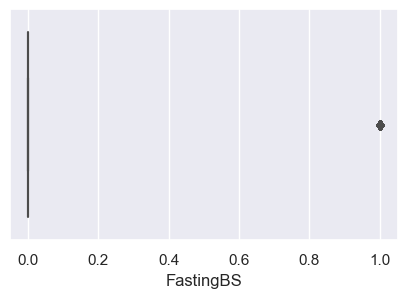

Q1:  0.0
Q3:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 214
__________________________________________________


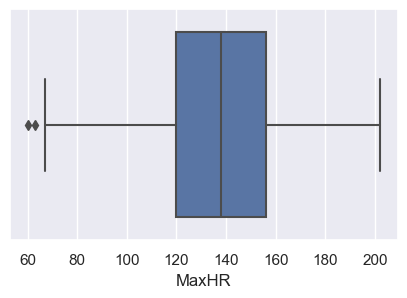

Q1:  120.0
Q3:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0
__________________________________________________


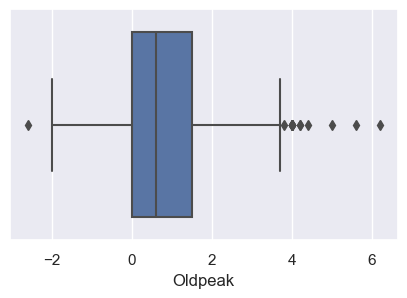

Q1:  0.0
Q3:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 15
__________________________________________________


In [25]:
numeric_col=df.describe().columns.to_list()
for column in numeric_col:
    if (column == 'HeartDisease'):
        break
    else:
        outliers_details_boxplot_graph(df[column])

### <font color='blue'>Observation: </font>
* At times its difficult to determine guilty outliers by using only box plot and IQR calculations. Thereby, we take a step further and do further analysis of outliers before handling it.
* As there isn't any outliers for Age, we will not be testing for outliers for this feature using z-score method.

#### Method 2- Handling outliers by using Z- score

In [26]:
# making a copy of the original dataframe such that we could work on handling of outliers on the copied one without changing the original one.
df1_copy = df

In [27]:
df1_copy.shape

(918, 12)

In [28]:
df1_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
def outliers_details_z_score(df_column):
    plt.figure(figsize=(5,3))
    sns.boxplot(x = df_column, data = df1_copy)
    plt.show()
    df1_copy['zscore']= ( df_column - df_column.mean() ) / df_column.std()
    print('Z-Score greater than 3:',len(df1_copy[df1_copy['zscore']>3]))
    print('Z-Score less than 3:',len(df1_copy[df1_copy['zscore']<-3]))
    print(df1_copy[(df1_copy.zscore<-3) | (df1_copy.zscore>3)])

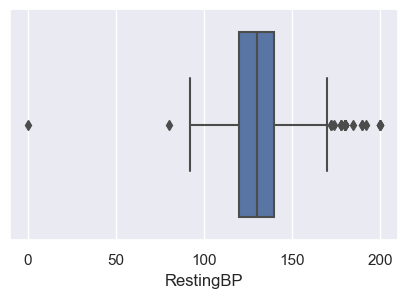

Z-Score greater than 3: 7
Z-Score less than 3: 1
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
449   55   M           NAP          0            0          0     Normal   
592   61   M           ASY        190          287          1        LVH   
732   56   F           ASY        200          288          1        LVH   
759   54   M           ATA        192          283          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease    zscore  
109    106              N      0.0       Up             0  3.111322  
241    142              Y      2.0     Flat             1  3.651449  
365    140              Y      1.0     Flat             

In [30]:
outliers_details_z_score(df1_copy.RestingBP)

In [31]:
df1_copy['RestingBP'].replace(to_replace = 0, value =df1_copy['RestingBP'].mean(), inplace=True)

In [32]:
df1_copy.shape

(918, 13)

In [33]:
print('Count of RestingBP with value 0 :', len(df1_copy[df1_copy.RestingBP==0]))

Count of RestingBP with value 0 : 0


In [34]:
df1_copy.RestingBP.describe()

count    918.000000
mean     132.540737
std       17.989932
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

### <font color='blue'>Observation: </font>
According to medical terms, a person's RestingBP cannot be 0; it indicates the patient is dead, and as the z-score states it as -7, this record was imputed with mean.
The other outliers aren't guilty, thus its not needed to be dropped. This is because according to medical term, RestingBP can be recorded at 200. This occurs when the patient is having a heart attack/stroke. As the core purpose of this prediction is to figure out heart disease. Hence, althought the z-score are greater than 3 we don't drop the outliers. 

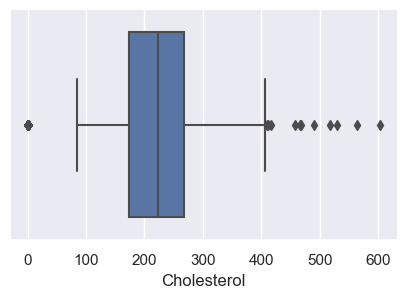

Z-Score greater than 3: 3
Z-Score less than 3: 0
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
76    32   M           ASY      118.0          529          0     Normal   
149   54   M           ASY      130.0          603          1     Normal   
616   67   F           NAP      115.0          564          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease    zscore  
76     130              N      0.0     Flat             1  3.018723  
149    125              Y      1.0     Flat             1  3.695238  
616    160              N      1.6     Flat             0  3.338696  


In [35]:
outliers_details_z_score(df1_copy.Cholesterol)

In [36]:
print('Count of Cholesterol with value 0 :', len(df1_copy[df1_copy.Cholesterol==0]))

Count of Cholesterol with value 0 : 172


In [37]:
print('Mean: ',df1_copy['Cholesterol'].mean())
print('Median: ',df1_copy['Cholesterol'].median())

Mean:  198.7995642701525
Median:  223.0


In [38]:
df1_copy.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [39]:
df1_copy['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace= True)

In [40]:
df1_copy.Cholesterol.describe()

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [41]:
print('Count of Cholesterol with value 0 after filling with NaN :', len(df1_copy[df1_copy.Cholesterol==0]))

Count of Cholesterol with value 0 after filling with NaN : 0


In [42]:
print('Mean: ',df1_copy['Cholesterol'].mean())
print('Median: ',df1_copy['Cholesterol'].median())

Mean:  244.6353887399464
Median:  237.0


In [43]:
df1_copy['Cholesterol'] = df1_copy['Cholesterol'].fillna(df1_copy['Cholesterol'].median())

In [44]:
print('Count of Cholesterol with value 0 :', len(df1_copy[df1_copy.Cholesterol==0]))

Count of Cholesterol with value 0 : 0


In [45]:
df1_copy.Cholesterol.describe()

count    918.000000
mean     243.204793
std       53.401297
min       85.000000
25%      214.000000
50%      237.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

### <font color='blue'>Observation:</font>
* Although the z-score indicates there are 3 outliers with score above 3.0, we don't drop these values. This is because, according to medical terms, a patient could have Cholesterol level above 600, which is one of the reasons for possible heart disease. Hence, these outlier's aren't guilty. Thereby, they aren't dropped.
* However, from Q1 Part(b), plus using the box plot (and IQR calculation above) we could tell that there are 172 guilty outliers. This is where the Cholesterol values have been recorded as 0.
* Before we impute the values with mean/median,first we have to consider the fact that generally mean/median imputation is done when there is NaN.
* However, in this case it has a value, which is 0. Keeping the dataframe as it is and filling up with mean/median wouldn't be ideal as there is a huge amount of records with 0; ie. 172, which wouldn't give an ideal mean/median value.
* Thereby, we first replace 0 with NaN. Later do the median imputation for the NaN.

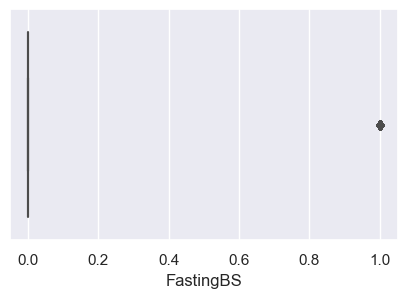

Z-Score greater than 3: 0
Z-Score less than 3: 0
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease, zscore]
Index: []


In [46]:
outliers_details_z_score(df1_copy.FastingBS)

### <font color='blue'>Observation:</font>
Through z-score method we could notice that FastingBS feature doesn't show any outliers. In addition to that, this feature is a binary variable. Hence, at this point there is no need to handle any outliers for this.

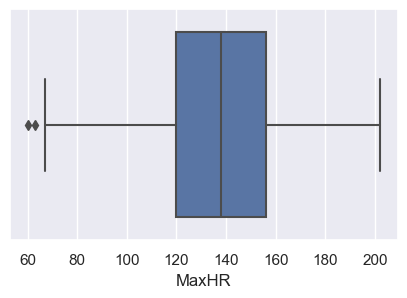

Z-Score greater than 3: 0
Z-Score less than 3: 1
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
390   51   M           ASY      140.0        237.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease    zscore  
390     60              N      0.0     Flat             1 -3.016825  


In [47]:
outliers_details_z_score(df1_copy.MaxHR)

### <font color='blue'>Observation:</font>
Through z-score method we could notice that MaxHR has only one outlier that is less than z-score 3. When we look into the value, it gave around 60. Which is not a guilty outlier according to dataset description. Hence, it was not handled.

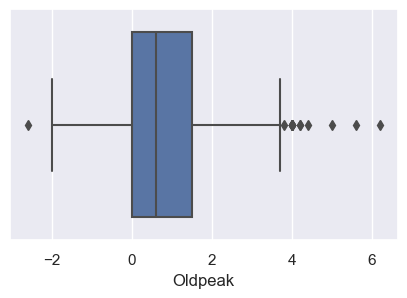

Z-Score greater than 3: 6
Z-Score less than 3: 1
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
166   50   M           ASY      140.0        231.0          0         ST   
324   46   M           ASY      100.0        237.0          1         ST   
702   59   M            TA      178.0        270.0          0        LVH   
771   55   M           ASY      140.0        217.0          0     Normal   
791   51   M           ASY      140.0        298.0          0     Normal   
850   62   F           ASY      160.0        164.0          0        LVH   
900   58   M           ASY      114.0        318.0          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease    zscore  
166    140              Y      5.0     Flat             1  3.855945  
324    133              N     -2.6     Flat             1 -3.269699  
702    145              N      4.2     Down             0  3.105877  
771    111              Y      5.6     Down             1  4.4

In [48]:
outliers_details_z_score(df1_copy.Oldpeak)

In [49]:
df1_copy.Oldpeak.describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [50]:
print('Count of Oldpeak with value greater than 6:', len(df1_copy[df1_copy.Oldpeak>6]))

Count of Oldpeak with value greater than 6: 1


In [51]:
print('Count of Oldpeak with value less than -3:', len(df1_copy[df1_copy.Oldpeak< -3]))

Count of Oldpeak with value less than -3: 0


In [52]:
df1_copy['Oldpeak'].replace(to_replace = 6.2 , value =df1_copy['Oldpeak'].mean(), inplace=True)

In [53]:
print('Count of Oldpeak with value greater than 6:', len(df1_copy[df1_copy.Oldpeak>6]))

Count of Oldpeak with value greater than 6: 0


### <font color='blue'>Observation: </font>
* Generally Oldpeak which is the ST depression value can have negative values according to medical terms, as its the observation of peaks which have various meanings for its ranges according to certain levels (eg. V2-V3). 
* Thereby, all negative values cannot be imputed or dropped nor can the higher values be altered. 
* However, the value 6.2 can be imputed as its way beyond the standard range. 
* Hence, it was imputed using the mean value. 
* https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/, https://www.medicalnewstoday.com/articles/st-depression-on-ecg#what-it-is - further information

In [54]:
#dropping the addition zscore column
df1_copy =df1_copy.drop('zscore', axis = 1)
df1_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [55]:
df1_copy.shape

(918, 12)

### <font color='blue'>Note: </font>
Unless outliers are proven guilty its not needed to be handled. This is mainly because, certain recorded data are mandatory. In addition to that, although it looks like an outlier it could be the actual recorded values. 
Thereby, above imputation for certain outliers were followed based on extensive analysis on domain as well as data analysis. 

### Part (d) - Encoding the categorical features by using Dummy Encoding method

In [56]:
# encoding for all categorical data, drop_first is used to save space
df_encoded_data = pd.get_dummies(df1_copy, columns = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first = True)
print(df_encoded_data)

     Age   RestingBP  Cholesterol  FastingBS  MaxHR   Oldpeak  HeartDisease  \
0     40  140.000000        289.0          0    172  0.000000             0   
1     49  160.000000        180.0          0    156  1.000000             1   
2     37  130.000000        283.0          0     98  0.000000             0   
3     48  138.000000        214.0          0    108  1.500000             1   
4     54  150.000000        195.0          0    122  0.000000             0   
5     39  120.000000        339.0          0    170  0.000000             0   
6     45  130.000000        237.0          0    170  0.000000             0   
7     54  110.000000        208.0          0    142  0.000000             0   
8     37  140.000000        207.0          0    130  1.500000             1   
9     48  120.000000        284.0          0    120  0.000000             0   
10    37  130.000000        211.0          0    142  0.000000             0   
11    58  136.000000        164.0          0     99 

In [57]:
df_encoded_data.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [58]:
# re-arranging the dataframe inorder to make it easy while doing the Standardization 
df_encoded_data = df_encoded_data[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease']]

In [59]:
df_encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140.0,289.0,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160.0,180.0,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130.0,283.0,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138.0,214.0,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150.0,195.0,0,122,0.0,1,0,1,0,1,0,0,0,1,0


### Part (e) - Rescaling feature by  using StandardScaler Standardization function

In [60]:
# calling the Standard Scaler class to carry out the standardization function
scaler = StandardScaler()
df_feat_data = scaler.fit_transform(df_encoded_data.drop('HeartDisease',axis = 1))


In [61]:
# dropping the target variable and applying standardization for the rest of the data.
df_feat_data = pd.DataFrame(df_feat_data ,columns = df_encoded_data.columns[:-1])
df_feat_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414861,0.858035,-0.551341,1.382928,-0.838436,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.527200,-1.184227,-0.551341,0.754157,0.112628,-1.938163,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.141308,0.745617,-0.551341,-1.525138,-0.838436,0.515952,2.075177,-0.532838,-0.229679,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.303628,-0.547191,-0.551341,-1.132156,0.588161,-1.938163,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.971031,-0.903182,-0.551341,-0.581981,-0.838436,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674


In [62]:
df_encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140.0,289.0,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160.0,180.0,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130.0,283.0,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138.0,214.0,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150.0,195.0,0,122,0.0,1,0,1,0,1,0,0,0,1,0


### <font color='blue'>Observation: </font>
* During the process of Standardization, the target variable is dropped. This is because, we will be using this as the features for value of x in our model building.

## 3) Modeling

### Part (a) - Partitioning Data into 30% for testing and 70% for training

In [63]:
# setting test split size as 30%
test_size = 0.3
x = df_feat_data
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [64]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (642, 15)
y_train dataset:  (642,)
X_test dataset:  (276, 15)
y_test dataset:  (276,)


### Part (b) - Prediction using KNN, SVM and Decision Tree

### <font color='blue'>KNN</font>

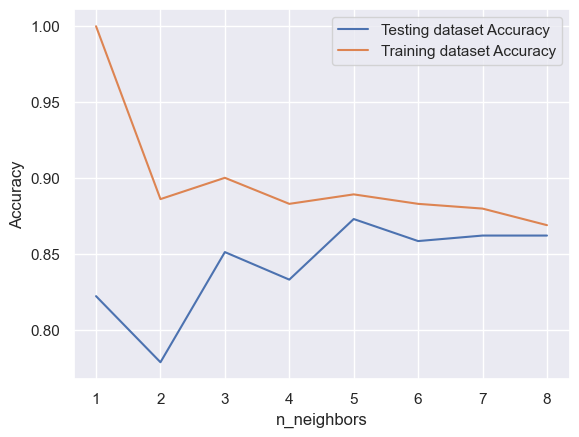

In [65]:
# this process is to find out the best n_neighbors for the model.
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')


plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### <font color='blue'>Observation: </font>
The result of the above graph shows that the best n_neighbor value is 5. Hence, we train and predict using KNN model by passing 5 for the n_neighbors in the following step

In [66]:
# predicting using best n_neighbor value for knn
knn_final = KNeighborsClassifier(n_neighbors=5)
  
knn_final.fit(X_train, y_train)

# Calculate the accuracy of the model
knn_predict = knn_final.predict(X_test) #Test Section
knn_cm = confusion_matrix(y_test, knn_predict) #Ploting
knn_acc_score = accuracy_score(y_test, knn_predict) #Accuracy Score


In [67]:
print("KNN Accuracy Score: ",knn_acc_score)
print("_"*50)
knn_class_report = classification_report(y_test, knn_predict)
print('\n Classification Report \n \n', knn_class_report)

KNN Accuracy Score:  0.8731884057971014
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



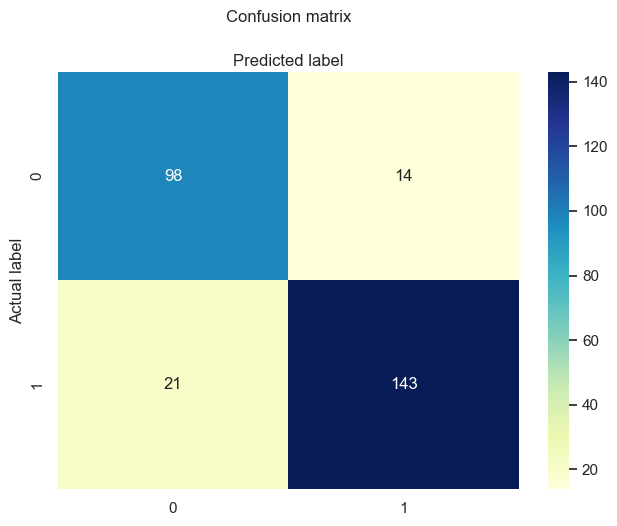

In [68]:
# confusion matrix 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(knn_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <font color='blue'>Observation: </font>
KNN with 5 n_neighbors gave us an accuracy score of 0.87. The number of TP are 143 and TN being 98 out of 276 test data.

### <font color='blue'>SVM</font>

In [69]:
# Building a Support Vector Machine on train data for linear
svm_model = SVC(C= .1, kernel='linear', gamma= 1, probability= True)
svm_model.fit(X_train, y_train)
 
# Calculate the accuracy of the model
svm_predict = svm_model.predict(X_test) #Test Section
svm_cm = confusion_matrix(y_test, svm_predict) #Ploting
svm_acc_score = accuracy_score(y_test, svm_predict) #Accuracy Score

In [70]:
print("SVM (linear) Accuracy Score: ",svm_acc_score)
print("_"*50)
svm_class_report = classification_report(y_test, svm_predict)
print('\n Classification Report \n \n', svm_class_report)

SVM (linear) Accuracy Score:  0.8768115942028986
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



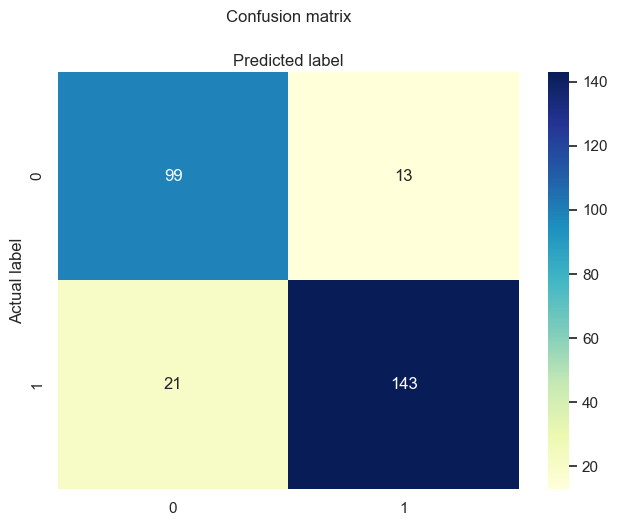

In [71]:
# confusion matrix for linear
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(svm_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
# Building a Support Vector Machine on train data for rbf
svm_model2 = SVC(kernel='rbf', probability= True)
svm_model2.fit(X_train, y_train)

# Calculate the accuracy of the model
svm2_predict = svm_model2.predict(X_test) #Test Section
svm2_cm = confusion_matrix(y_test, svm2_predict) #Ploting
svm2_acc_score = accuracy_score(y_test, svm2_predict) #Accuracy Score

In [73]:
print("SVM (rbf/default) Accuracy Score: ",svm2_acc_score)
print("_"*50)
svm2_class_report = classification_report(y_test, svm2_predict)
print('\n Classification Report \n \n', svm2_class_report)

SVM (rbf/default) Accuracy Score:  0.8659420289855072
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.90      0.87      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



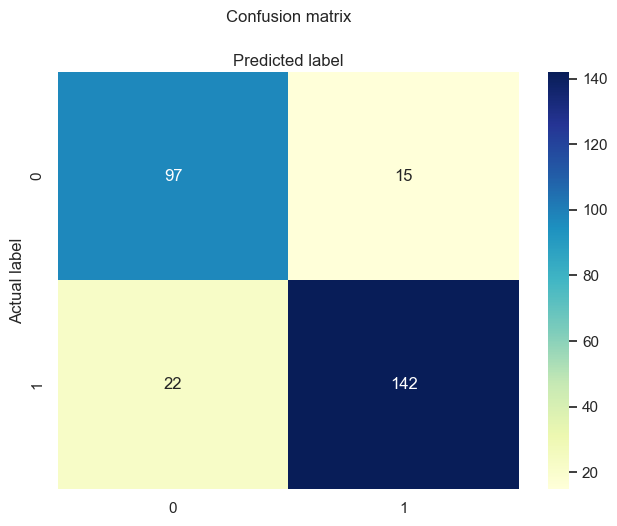

In [74]:
# confusion matrix for rbf
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(svm2_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [75]:
# Building a Support Vector Machine on train data for sigmoid 
svm_model3 = SVC(kernel='sigmoid', probability= True)
svm_model3.fit(X_train, y_train)

# Calculate the accuracy of the model
svm3_predict = svm_model3.predict(X_test) #Test Section
svm3_cm = confusion_matrix(y_test, svm3_predict) #Ploting
svm3_acc_score = accuracy_score(y_test, svm3_predict) #Accuracy Score

In [76]:
print("SVM (sigmoid) Accuracy Score: ",svm3_acc_score)
print("_"*50)
svm3_class_report = classification_report(y_test, svm3_predict)
print('\n Classification Report \n \n', svm3_class_report)

SVM (sigmoid) Accuracy Score:  0.8695652173913043
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



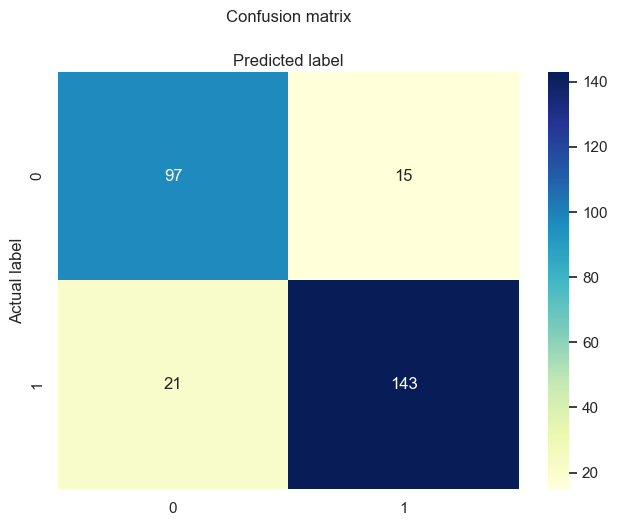

In [77]:
# confusion matrix for sigmoid
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(svm3_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <font color='blue'>Observation: </font>
To figure out which SVM kernel gives better prediction result, the data was trained in three various kernals. The trained kernals were Linear, RBF (default) and Sigmoid respectively. 
* Linear: Gave 0.88 accuracy with 143 TP and 99 TN values.
* RBF: Gave 0.87 accuracy with 142 TP and 97 TN values.
* Sigmoid: Gave 0.87 accuracy with 143 TP and 97 TN values .

### <font color='blue'>Decision Tree</font>

In [78]:
# prediction on decision tree without parameter tuning
DT_model = DecisionTreeClassifier(random_state = 42)
DT_model.fit(X_train, y_train)

# Calculate the accuracy of the model
dt_predict = DT_model.predict(X_test) #Test Section
dt_cm = confusion_matrix(y_test, dt_predict) #Ploting
dt_acc_score = accuracy_score(y_test, dt_predict) #Accuracy Score

In [79]:
print("Decision Tree Accuracy Score: ",dt_acc_score)
print("_"*50)
dt_class_report = classification_report(y_test, dt_predict)
print('\n Classification Report \n \n', dt_class_report)

Decision Tree Accuracy Score:  0.7137681159420289
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.62      0.78      0.69       112
           1       0.81      0.67      0.74       164

    accuracy                           0.71       276
   macro avg       0.72      0.72      0.71       276
weighted avg       0.73      0.71      0.72       276



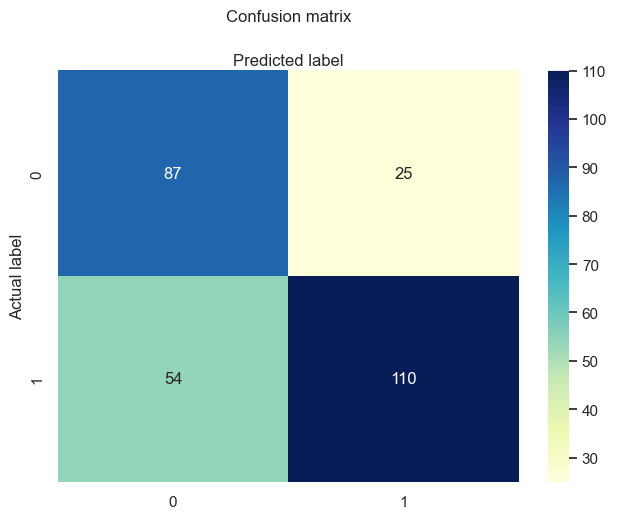

In [80]:
# confusion matrix for decision tree
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(dt_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <font color='blue'>Observation: </font>
Without any parameter tuning, Decision Tree gives an accuracy of 0.71 with 110 TP and 87 TN.

### <font color='blue'>Note: </font>
Overall, based on accuracy (without parameter tuning for DT model) it is noticeable that SVM is the best model. 

## 4) Model Evaluation & Selection

### Part (a) - GridSearchCV, best estimator finding for Decision Tree Model

In [81]:
# finding the best parameters for Decision Tree using GridSearchCV method
dt_best_params = {'criterion' : ['gini', 'entropy'],
                  'max_depth' : range(1, 25),
                  'min_samples_leaf' : range(1, 25)
                 }
dt_gridsearch_model = GridSearchCV(DT_model, dt_best_params)
dt_gridsearch_model.fit(X_train, y_train)

print('Best Parameters for Decision Tree : ', dt_gridsearch_model.best_params_)
print('Best Score for Decision Tree : ', dt_gridsearch_model.best_score_)

Best Parameters for Decision Tree :  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 13}
Best Score for Decision Tree :  0.8394985465116278


### <font color='blue'>Observation: </font>
According to the GridSearch done, the best parameter selected for Decision Tree for criterion is entropy, max_depth is 6 and min_samples_leaf is 13.

### Part (b) - Training Decision Tree with Tuned parameters

In [82]:
# doing the prediction for Decision Tree using tuned parameters
dt_tuned_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf=13)
dt_tuned_model.fit(X_train, y_train)

# Calculate the accuracy of the model
dt_tuned_predict = dt_tuned_model.predict(X_test) #Test Section
dt_tuned_cm = confusion_matrix(y_test, dt_tuned_predict) #Ploting
dt_tuned_acc_score = accuracy_score(y_test, dt_tuned_predict) #Accuracy Score

In [83]:
print("Tuned Decision Tree Accuracy Score: ",dt_tuned_acc_score)
print("_"*50)
dt_tuned_class_report = classification_report(y_test, dt_tuned_predict)
print('\n Classification Report \n \n', dt_tuned_class_report)

Tuned Decision Tree Accuracy Score:  0.8152173913043478
__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       112
           1       0.88      0.80      0.84       164

    accuracy                           0.82       276
   macro avg       0.81      0.82      0.81       276
weighted avg       0.82      0.82      0.82       276



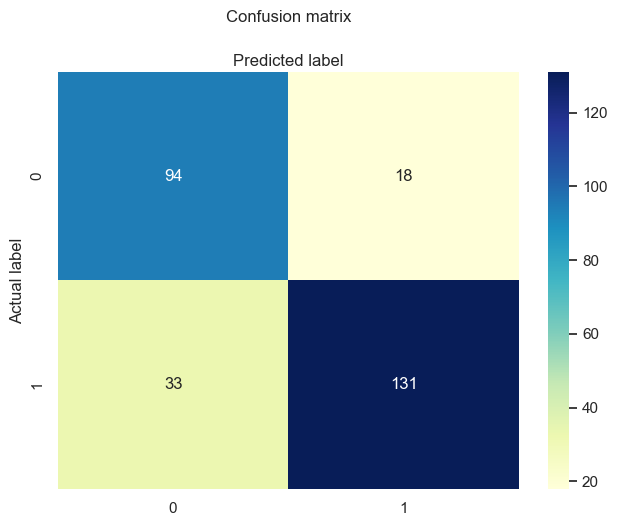

In [84]:
#confusion matrix for tuned Decision Tree 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(dt_tuned_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <font color='blue'>Observation: </font>
After parameter tuning, Decision Tree gives an accuracy of 0.82 (an improvement by 0.11), with 131 TP and 94 TN values.

### Part (c) - Comparison of trained models based on Classification Metrics (Precision, Recall, Accuracy and F1- score

In [85]:
print('\n Classification Report For KNN \n \n', knn_class_report)
print('_' * 50)
print('\n Classification Report For SVM (Linear) \n \n', svm_class_report)
print('_' * 50)
print('\n Classification Report For SVM (rbf/default) \n \n', svm2_class_report)
print('_' * 50)
print('\n Classification Report For SVM (sigmoid) \n \n', svm3_class_report)
print('_' * 50)
print('\n Classification Report For Decision Tree before tunning \n \n', dt_class_report)
print('_' * 50)
print('\n Classification Report For Decision Tree after tunning \n \n', dt_tuned_class_report)


 Classification Report For KNN 
 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

__________________________________________________

 Classification Report For SVM (Linear) 
 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

__________________________________________________

 Classification Report For SVM (rbf/default) 
 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
    

### <font color='blue'>Observation: </font>
The table below gives a summarized score values for all the models that predicted as <b>YES (1)</b> for <b>Heart Disease </b>.

| Model Name | Precision | Recall | F-1 Measure | Accuracy |
| --- | --- | --- | --- | --- |
| KNN | 0.91 | 0.87 | 0.89 | 0.87 |
| SVM Linear | 0.92 | 0.87 | 0.89 | 0.88 |
| SVM RBF(Default) | 0.90 | 0.87 | 0.88 | 0.87 |
| SVM Sigmoid | 0.91 | 0.87 | 0.89 | 0.87 |
| Decision Tree Before Tuning | 0.81 | 0.67 | 0.74 | 0.71 |
| Decision Tree After Tuning | 0.88 | 0.80 | 0.84 | 0.82 |

The table below gives a summarized score values for all the models that predicted as <b>NO (0)</b> for <b>Heart Disease </b>.

| Model Name | Precision | Recall | F-1 Measure | Accuracy |
| --- | --- | --- | --- | --- |
| KNN | 0.82 | 0.88 | 0.85 | 0.87 |
| SVM Linear | 0.82 | 0.88 | 0.85 | 0.88 |
| SVM RBF(Default) | 0.82 | 0.87 | 0.84 | 0.87 |
| SVM Sigmoid | 0.82 | 0.87 | 0.84 | 0.87 |
| Decision Tree Before Tuning | 0.62 | 0.78 | 0.69 | 0.71 |
| Decision Tree After Tuning | 0.74 | 0.84 | 0.79 | 0.82 |

1. Based on the above summary chart, it could be observed that the Precision, Recall, F-1 Score and Accuracy have increased after hyperparameter tuning for Decision Tree.
2. Out of the three models', KNN and SVM gave better score for Precision, Recall, F-1 Score and Accuracy.
3. Especially, SVM (Linear) gave the highest Precision and Accuracy values, 0.92 and 0.88 respectively for Heart Disease present prediction.
4. SVM (Linear) and KNN gave the highest Recall values of 0.88 for Heart Disease absence prediction.
5. Yet again, with comparative to the other models, SVM (Linear) predicted the absence of Heart Disease with a highest accuracy score of 0.88.
6. Although, there seems to be a greater improvement after parameter tuning for the Decision Tree model, it's metrics didn't reach up to the par of other models.

### Part (d) - ROC graph for each model.

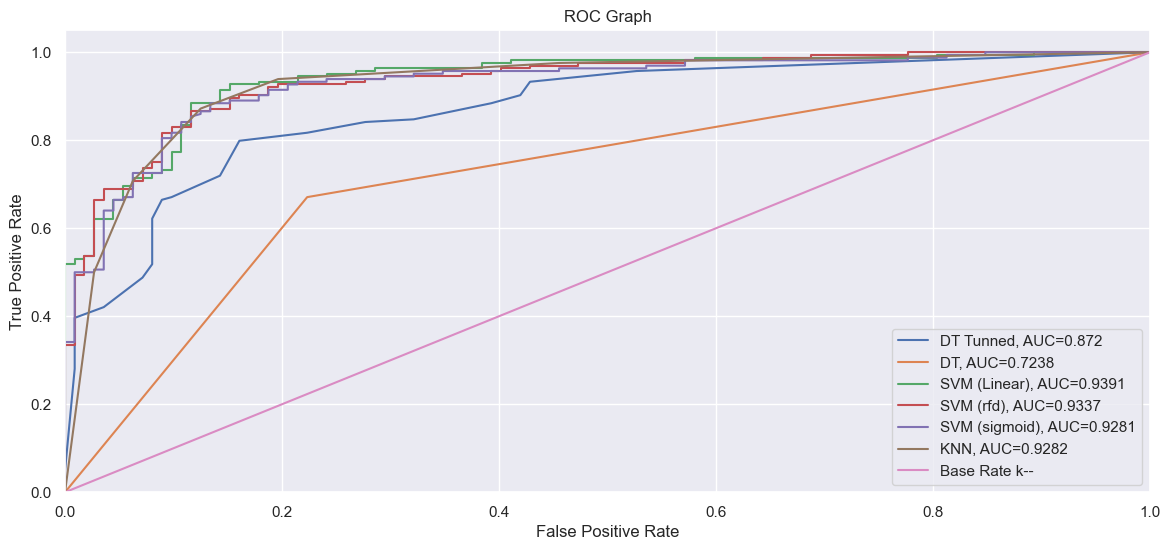

In [86]:
#ROC and AUC graph for all the used models

plt.figure(figsize=(14, 6))

y_pred = dt_tuned_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DT Tunned, AUC="+str(auc))

y_pred2 = DT_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred2)
auc = round(metrics.roc_auc_score(y_test, y_pred2), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))

y_pred3 = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred3)
auc = round(metrics.roc_auc_score(y_test, y_pred3), 4)
plt.plot(fpr,tpr,label="SVM (Linear), AUC="+str(auc))

y_pred4 = svm_model2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred4)
auc = round(metrics.roc_auc_score(y_test, y_pred4), 4)
plt.plot(fpr,tpr,label="SVM (rfd), AUC="+str(auc))

y_pred5 = svm_model3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred5)
auc = round(metrics.roc_auc_score(y_test, y_pred5), 4)
plt.plot(fpr,tpr,label="SVM (sigmoid), AUC="+str(auc))

y_pred6 = knn_final.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred6)
auc = round(metrics.roc_auc_score(y_test, y_pred6), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

plt.plot([0,1], [0,1],label='Base Rate ' 'k--')

#create ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### <font color='blue'>Observation: </font>
##### AUC values for trained models;
Decision Tree after tuning gives an AUC value of 0.872, whereas before tuning it gave 0.7238. 
<p> 
For SVM models; Linear gives 0.9391, rfd/default gives 0.9337, sigmoid gives 0.9281.
<p>
KNN gives 0.9282.
<p>
Based on AUC values, we could tell that SVM model with Linear kernal gives the best performance.

### Part (e) - Explanation for identifying which is the best model.

SVM (Linear) gave the highest AUC values; i.e. 0.9391, in addition to that Precision and Accuracy values too were the greatest comparative to KNN & Decision Tree models. 
<p>
According to the Confusion Matrix, SVM's (Linear) model produced 143 - TP values and 99 - TN, which in total gives us 242 out of 276 test data being predicted correctly (which is the greatest value compared with other models's Confusion Matrix result). 
<p>
Based on extended explanation given above ( Q4 part c) and AUC (Area Under the Curve) values produced based on ROC Graph, it could be concluded that SVM model outperformed all other models. Thus, <b>SVM</b> with Linear kernal is the best model

